In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")


data_dir = Path("data")
data_dir.mkdir(exist_ok=True) 

raw_data_file = "../data/sierraleone-bumbuna.csv"
df = pd.read_csv(raw_data_file)

print(df.head())

             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


Summary Statistics & Missing-Value Report
- df.describe() on all numeric columns., df.isna().sum() and list any column with >5% nulls.

In [12]:

print(df.describe())

missing_values = df.isna().sum()
print(missing_values)

high_null_cols = missing_values[missing_values / len(df) > 0.05]
print(high_null_cols)

                           Timestamp            GHI            DNI  \
count                         514854  514854.000000  514854.000000   
mean   2022-02-07 00:38:57.731823104     233.725055     166.283925   
min              2021-08-09 00:01:00     -11.100000      -7.800000   
25%              2021-11-07 19:54:15      -2.000000      -0.500000   
50%              2022-02-06 02:03:30       0.200000      -0.200000   
75%              2022-05-09 18:54:45     460.300000     315.200000   
max              2022-08-09 00:00:00    1221.000000     952.300000   
std                              NaN     326.863616     262.046732   

                 DHI           ModA           ModB           Tamb  \
count  514854.000000  514854.000000  514854.000000  514854.000000   
mean      109.804084     229.940692     222.747296      28.126600   
min       -12.600000       0.000000       0.000000      11.000000   
25%        -2.100000       0.000000       0.000000      24.100000   
50%         0.100000    

Outlier Detection & Basic Cleaning
- Look for missing values, outliers, or incorrect entries, especially in columns like GHI, DNI, and DHI and check for outliers, especially in sensor readings (ModA, ModB) and wind speed data (WS, WSgust).
- Compute Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust; flag rows with |Z|>3.
- Drop or impute (median) missing values in key columns.
- Export cleaned DataFrame to data/<country>_clean.csv (ensure data/ is in .gitignore and never commit CSVs).


 Outlier Analysis for GHI 


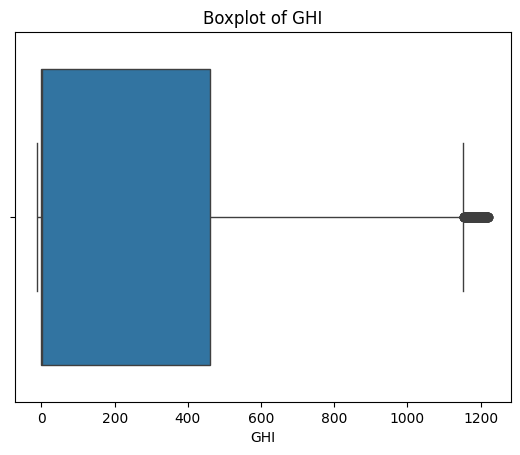

Number of outliers (Z > 3) in GHI: 16
                Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
744   2021-08-09 14:29:00  1216.0  791.9  468.3  1118.0  1118.0  31.1  64.5   
2070  2021-08-10 12:35:00  1215.0  805.0  393.6  1138.0  1145.0  32.1  63.4   
2141  2021-08-10 13:46:00  1220.0  711.9  504.0  1149.0  1146.0  31.6  63.8   
4882  2021-08-12 11:48:00  1216.0  772.1  450.2  1105.0  1107.0  30.0  70.5   
7720  2021-08-14 12:12:00  1217.0  773.5  436.1  1139.0  1141.0  29.2  76.1   

       WS  WSgust  ...     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
744   3.4     4.6  ...  275.0     10.6  997         0            0.0   58.0   
2070  3.0     4.1  ...  269.7     16.5  997         0            0.0   62.2   
2141  3.9     4.9  ...  257.1     11.6  996         0            0.0   47.3   
4882  3.2     4.1  ...  169.3      9.3  997         0            0.0   70.8   
7720  3.0     3.6  ...  223.0     12.7  995         0            0.0   58.2   

      TModB 

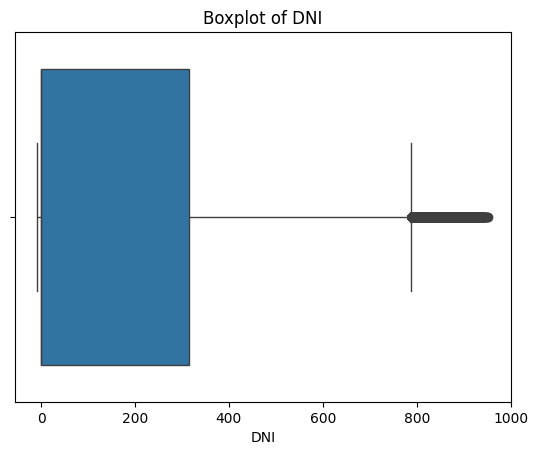

Number of outliers (Z > 3) in DNI: 0

 Outlier Analysis for DHI 


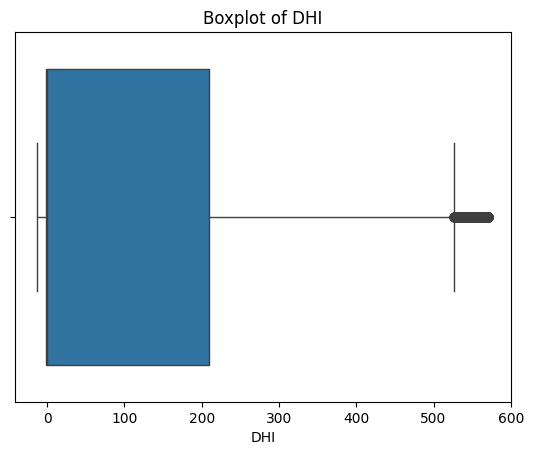

Number of outliers (Z > 3) in DHI: 892
               Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
690  2021-08-09 11:40:00  702.4  137.2  562.1  652.0  656.8  30.1  69.2  3.6   
692  2021-08-09 11:42:00  670.4  103.4  562.2  625.0  630.0  30.0  68.9  4.4   
706  2021-08-09 12:10:00  576.9    6.1  566.4  539.0  542.3  30.4  67.3  2.4   
712  2021-08-09 12:17:00  670.0   95.7  566.7  622.9  626.9  31.0  65.6  3.0   
720  2021-08-09 12:28:00  633.4   60.0  565.8  594.3  598.7  30.9  67.3  2.4   

     WSgust  ...     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
690     5.1  ...  211.9      9.5  999         0            0.0   57.3   49.4   
692     5.1  ...  226.9     11.1  999         0            0.0   56.8   49.2   
706     2.9  ...  187.3     10.4  999         0            0.0   58.6   50.3   
712     3.9  ...  198.6     13.9  999         0            0.0   57.9   49.9   
720     3.4  ...  201.5     20.1  999         0            0.0   58.7   50.1   


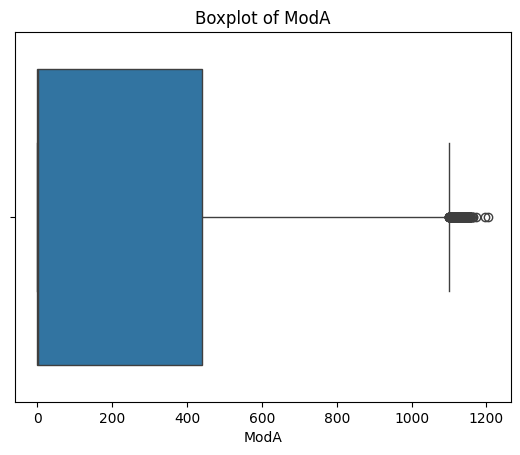

Number of outliers (Z > 3) in ModA: 1
                  Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
184414  2021-12-16 12:57:00  1093.0  866.5  362.3  1205.1  1117.0  30.1  16.5   

         WS  WSgust  ...     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
184414  3.9     5.9  ...  101.8     13.4  996         0            0.0   50.4   

        TModB  Comments  Cleaning Flag  ModA_zscore  
184414   40.4       NaN              0     3.020157  

[1 rows x 21 columns]

 Outlier Analysis for ModB 


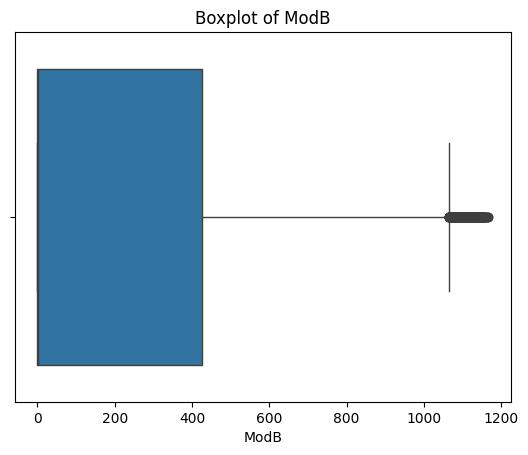

Number of outliers (Z > 3) in ModB: 4
                 Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
52388  2021-09-15 12:43:00  1193.0  805.0  364.8  1157.2  1163.0  31.1  72.3   
52394  2021-09-15 12:49:00  1209.0  851.0  336.9  1172.7  1167.0  31.4  69.1   
73634  2021-09-30 12:04:00  1159.0  883.0  290.7  1165.0  1167.0  30.1  71.3   
73648  2021-09-30 12:19:00  1176.0  893.0  291.5  1162.0  1163.0  31.0  69.0   

        WS  WSgust  ...     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
52388  3.2     4.6  ...  167.5     19.7  997         0            0.0   62.1   
52394  2.1     3.1  ...  170.2     11.3  997         0            0.0   64.2   
73634  1.0     1.6  ...  288.2     10.3  996         0            0.0   66.2   
73648  1.9     2.6  ...  217.6     27.9  996         0            0.0   66.2   

       TModB  Comments  Cleaning Flag  ModB_zscore  
52388   48.4       NaN              0     3.002506  
52394   53.6       NaN              0     3.015279  
7

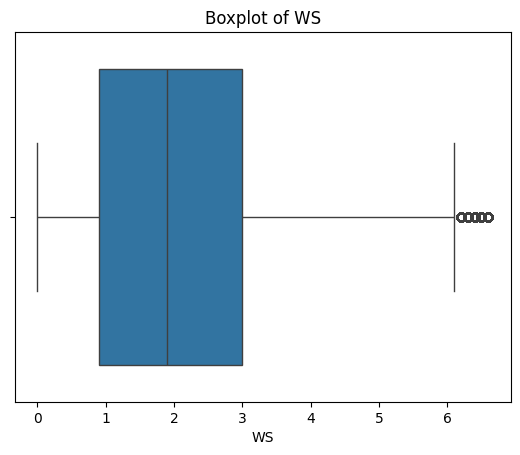

Number of outliers (Z > 3) in WS: 311
                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
2824   2021-08-11 01:11:00 -1.2 -0.2 -0.6   0.0   0.0  23.9  96.2  6.6   
9843   2021-08-16 00:15:00 -1.7  0.1 -1.7   0.0   0.0  22.5  95.1  6.6   
13596  2021-08-18 17:07:00 -0.1 -0.2 -0.5   2.1   2.1  22.9  97.4  6.6   
19766  2021-08-23 01:09:00 -0.9  0.0 -0.8   0.0   0.0  26.0  92.8  6.6   
24097  2021-08-26 03:31:00 -1.2 -0.2 -1.0   0.0   0.0  22.2  97.7  6.6   

       WSgust  ...     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
2824      8.4  ...  246.1      9.8  996         0            0.0   24.7   
9843      8.4  ...  106.3     10.6  997         0            0.0   23.0   
13596     7.7  ...  257.0      8.4  995         0            0.0   23.8   
19766     8.4  ...   94.9     12.1  997         0            0.0   26.1   
24097     7.7  ...  151.9     12.9  996         0            0.1   22.9   

       TModB  Comments  Cleaning Flag  WS_zscore  
2824    24.2   

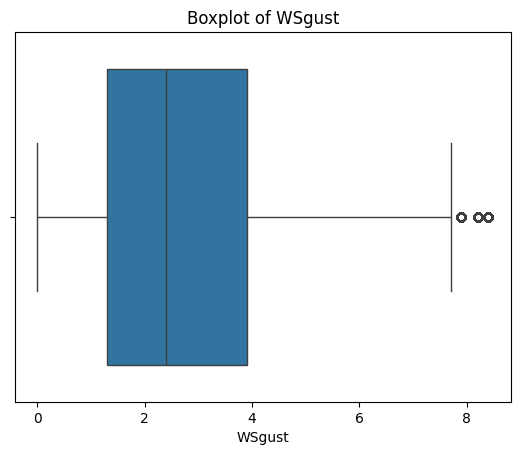

Number of outliers (Z > 3) in WSgust: 665
                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
2751   2021-08-10 23:57:00 -1.2 -0.5 -1.0   0.0   0.0  25.3  91.5  5.6   
2824   2021-08-11 01:11:00 -1.2 -0.2 -0.6   0.0   0.0  23.9  96.2  6.6   
2862   2021-08-11 01:54:00 -0.1 -0.2  0.1   0.0   0.0  23.5  96.3  5.7   
9843   2021-08-16 00:15:00 -1.7  0.1 -1.7   0.0   0.0  22.5  95.1  6.6   
13594  2021-08-18 17:05:00 -0.1 -0.1 -0.5   2.0   1.9  22.9  97.9  6.4   

       WSgust  ...     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
2751      8.4  ...   50.2     11.5  996         0            0.0   25.9   
2824      8.4  ...  246.1      9.8  996         0            0.0   24.7   
2862      8.4  ...  259.3     12.4  996         0            0.0   24.2   
9843      8.4  ...  106.3     10.6  997         0            0.0   23.0   
13594     8.4  ...  232.0     15.3  995         0            0.1   23.9   

       TModB  Comments  Cleaning Flag  WSgust_zscore  
2751   

In [ ]:
df['Cleaning Flag'] = 0

cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for col in cols_to_check:
    if col in df.columns:
        print(f"\n Outlier Analysis for {col} ")
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()


        df[f'{col}_zscore'] = np.abs(stats.zscore(df[col].fillna(df[col].median())))
        outliers = df[df[f'{col}_zscore'] > 3]
        print(f"Number of outliers (Z > 3) in {col}: {len(outliers)}")
        if not outliers.empty:
            print(outliers.head())
        df['Cleaning Flag'] = np.where(df[f'{col}_zscore'] > 3, 1, df['Cleaning Flag'])
        df.drop(columns=[f'{col}_zscore'], inplace=True)


key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb']
for col in key_cols:
    if col in df.columns:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"\nMissing values in {col} imputed with median: {median_val}")

print("\n Missing Value Report After Imputation")
print(df.isna().sum())

cleaned_data_file = data_dir / "../data/sierraleone-bumbuna.csv"
df.to_csv(cleaned_data_file, index=False)
print(f"\nCleaned data exported to: {cleaned_data_file}")

Time Series Analysis
- Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp.
- Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 

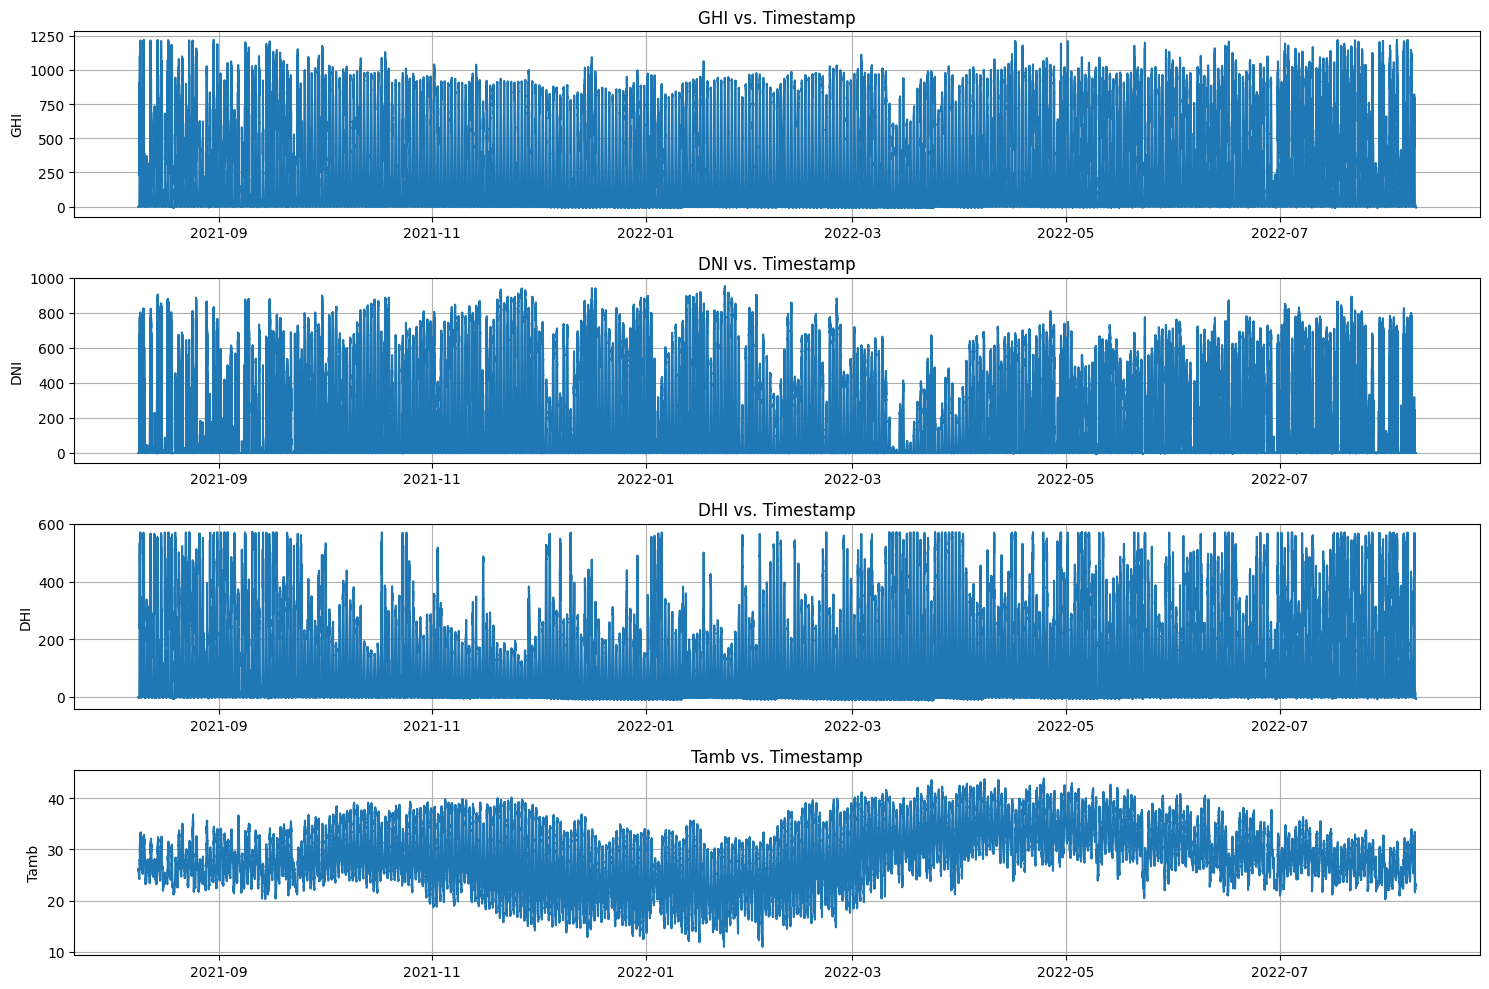

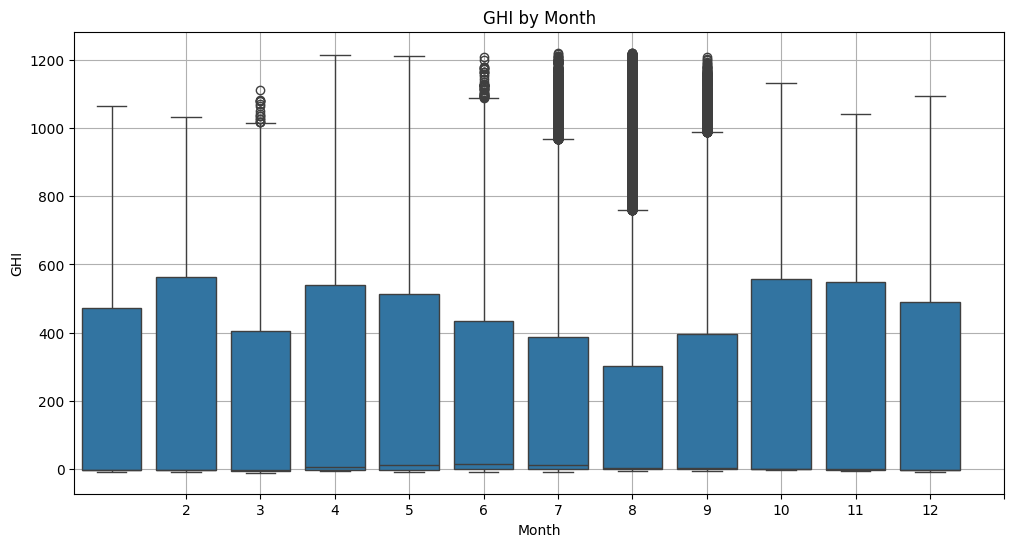

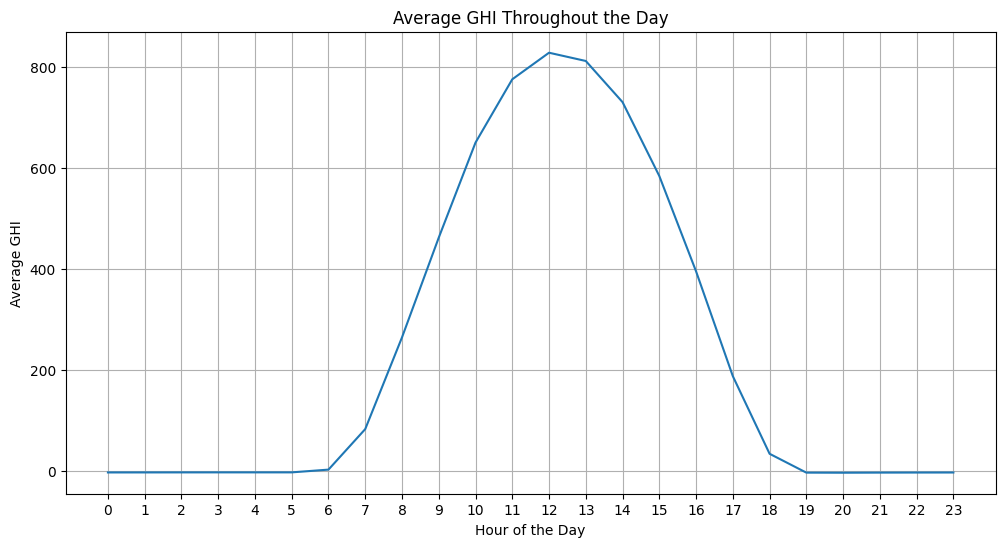

In [ ]:
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Month'] = df['Timestamp'].dt.month
    df['Hour'] = df['Timestamp'].dt.hour

    time_series_cols = ['GHI', 'DNI', 'DHI', 'Tamb']
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(time_series_cols, 1):
        plt.subplot(len(time_series_cols), 1, i)
        plt.plot(df['Timestamp'], df[col])
        plt.title(f'{col} vs. Timestamp')
        plt.ylabel(col)
        plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Month', y='GHI', data=df)
    plt.title('GHI by Month')
    plt.xlabel('Month')
    plt.ylabel('GHI')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.show()

    # Trends throughout the day (example with GHI)
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Hour', y='GHI', data=df.groupby('Hour')['GHI'].mean().reset_index())
    plt.title('Average GHI Throughout the Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average GHI')
    plt.xticks(range(24))
    plt.grid(True)
    plt.show()
else:
    print("\nWarning: 'Timestamp' column not found for Time Series Analysis.")

Cleaning Impact
- Group by Cleaning flag and plot average ModA & ModB pre/post-clean.


--- Average ModA & ModB Pre/Post Cleaning ---
                     ModA        ModB
Cleaning Flag                        
0              228.554799  221.450676
1              623.207909  590.681858


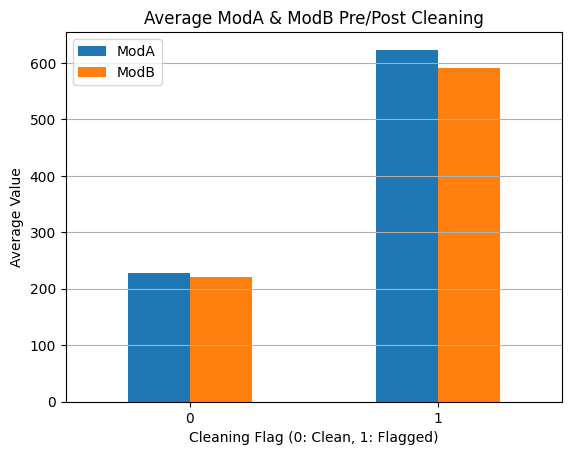

In [ ]:
if 'Cleaning Flag' in df.columns and 'ModA' in df.columns and 'ModB' in df.columns:
    cleaning_impact = df.groupby('Cleaning Flag')[['ModA', 'ModB']].mean()
    print("\n Average ModA & ModB Pre/Post Cleaning ")
    print(cleaning_impact)

    cleaning_impact.plot(kind='bar', rot=0)
    plt.title('Average ModA & ModB Pre/Post Cleaning')
    plt.ylabel('Average Value')
    plt.xlabel('Cleaning Flag (0: Clean, 1: Flagged)')
    plt.grid(axis='y')
    plt.show()
else:
    print("\nWarning: 'Cleaning Flag', 'ModA', or 'ModB' columns not found for Cleaning Impact analysis.")

Correlation and Relationship Analysis
- Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).
- Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

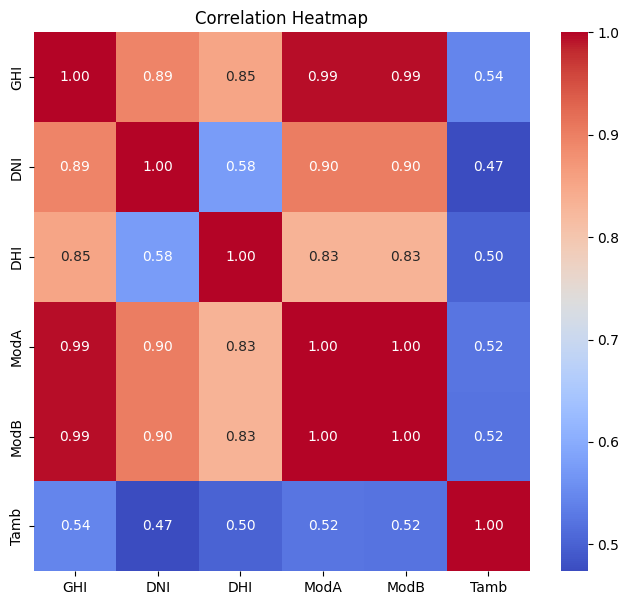

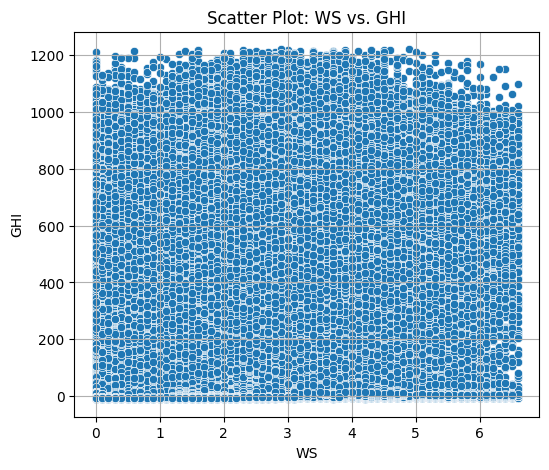

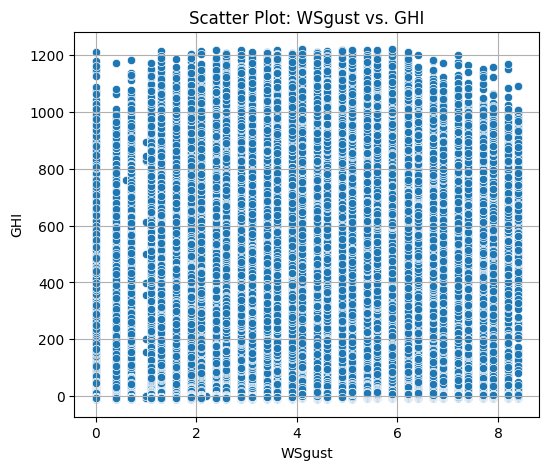

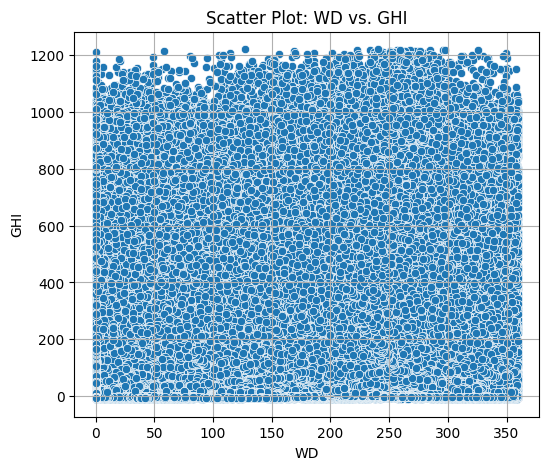

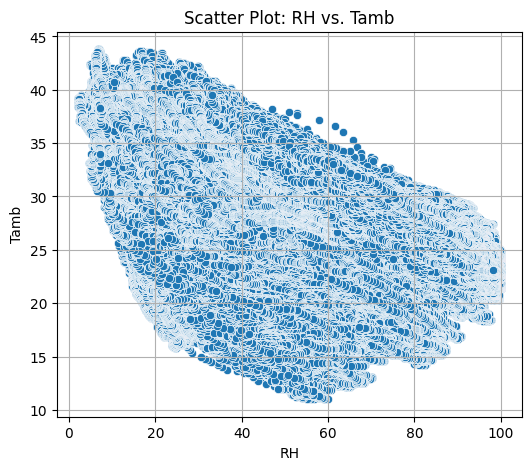

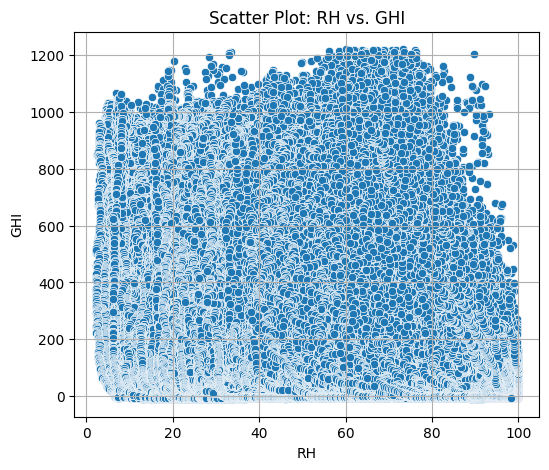

In [ ]:
corr_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb']
corr_df = df[corr_cols].corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

scatter_cols = [('WS', 'GHI'), ('WSgust', 'GHI'), ('WD', 'GHI'), ('RH', 'Tamb'), ('RH', 'GHI')]
for col1, col2 in scatter_cols:
    if col1 in df.columns and col2 in df.columns:
        plt.figure(figsize=(6, 5))
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.title(f'Scatter Plot: {col1} vs. {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.grid(True)
        plt.show()
    else:
        print(f"\nWarning: One or both of '{col1}', '{col2}' columns not found for scatter plot.")

Wind & Distribution Analysis
- Wind rose or radial bar plot of WS/WD.
- Histograms for GHI and one other variable (e.g. WS).

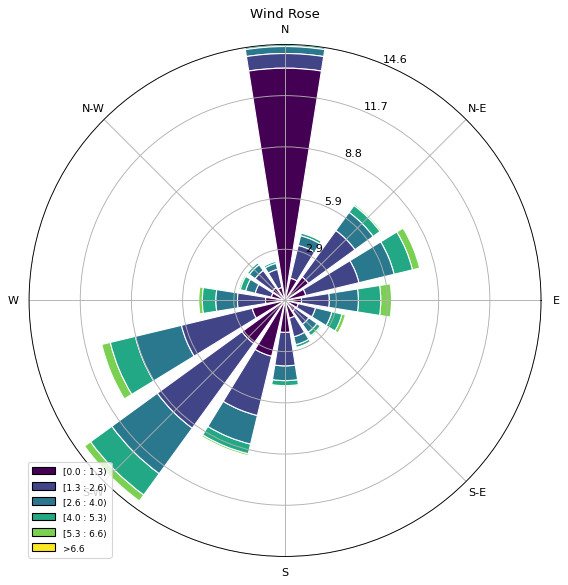

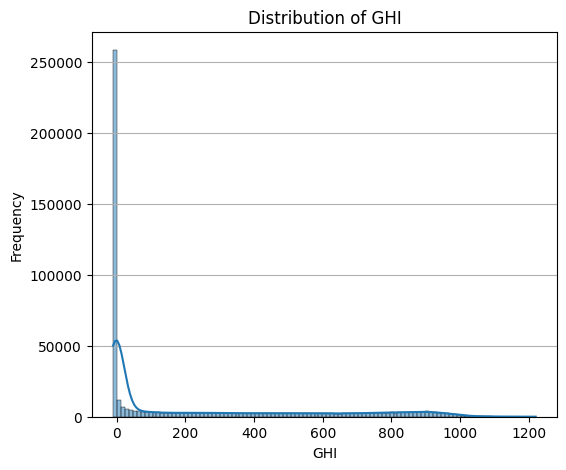

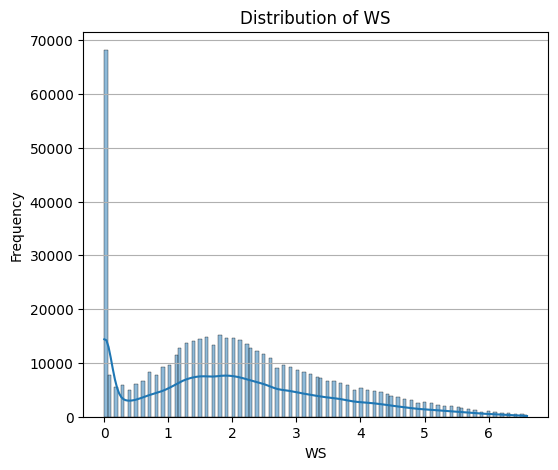

In [ ]:
if 'WS' in df.columns and 'WD' in df.columns:
    from windrose import WindroseAxes
    ax = WindroseAxes.from_ax()
    ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    plt.title('Wind Rose')
    plt.show()
else:
    print("\nWarning: 'WS' or 'WD' columns not found for Wind Rose analysis.")


hist_cols = ['GHI', 'WS']
for col in hist_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 5))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(axis='y')
        plt.show()
    else:
        print(f"\nWarning: '{col}' column not found for histogram.")

Temperature Analysis
- Examine how relative humidity (RH) might influence temperature readings and solar radiation.

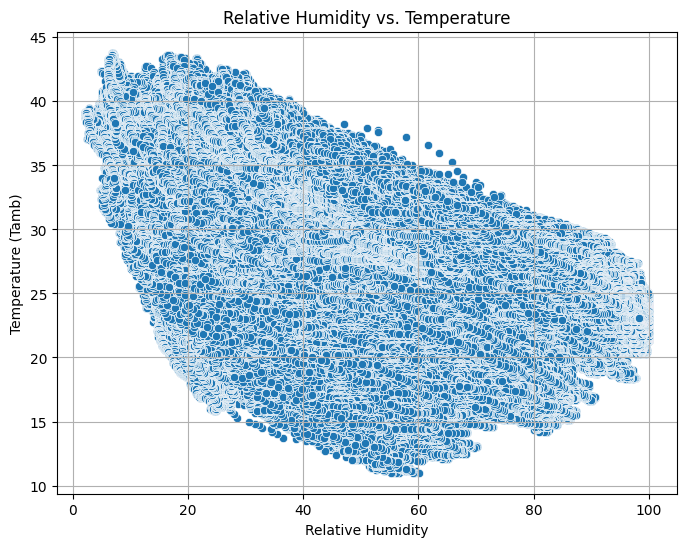

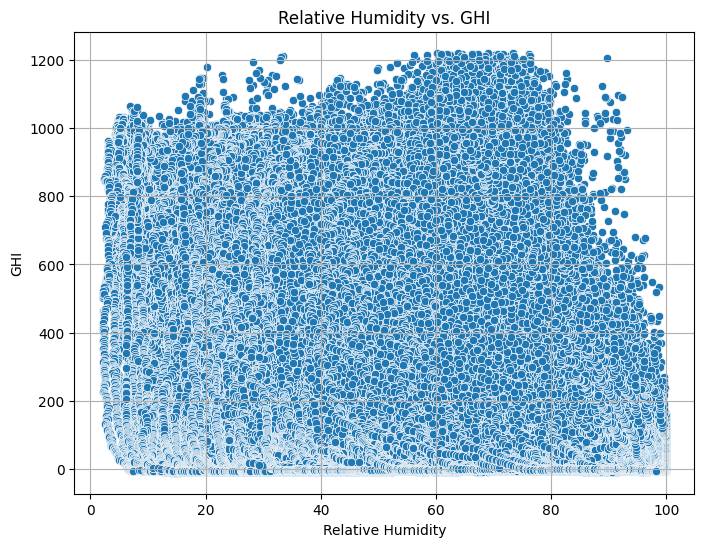

In [10]:
if 'RH' in df.columns and 'Tamb' in df.columns and 'GHI' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['RH'], y=df['Tamb'])
    plt.title('Relative Humidity vs. Temperature')
    plt.xlabel('Relative Humidity')
    plt.ylabel('Temperature (Tamb)')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['RH'], y=df['GHI'])
    plt.title('Relative Humidity vs. GHI')
    plt.xlabel('Relative Humidity')
    plt.ylabel('GHI')
    plt.grid(True)
    plt.show()
else:
    print("\nWarning: 'RH', 'Tamb', or 'GHI' columns not found for Temperature Analysis.")

Bubble Chart
 - GHI vs. Tamb with bubble size = RH or BP.

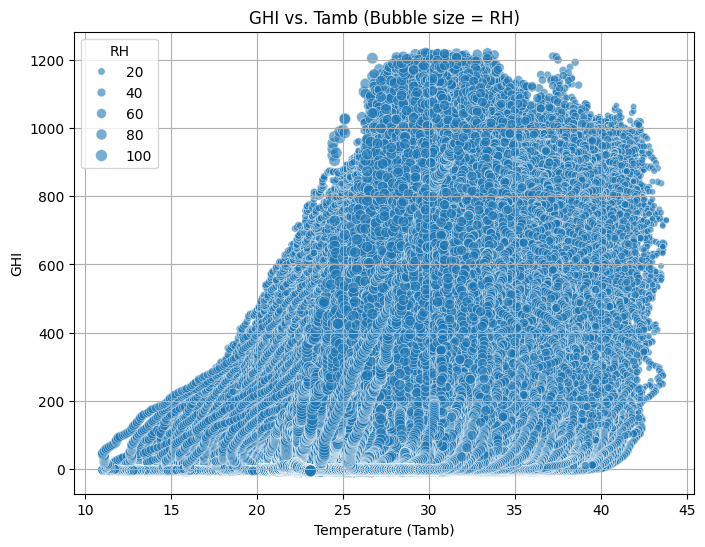

In [11]:
if 'GHI' in df.columns and 'Tamb' in df.columns and 'RH' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Tamb'], y=df['GHI'], size=df['RH'], alpha=0.6)
    plt.title('GHI vs. Tamb (Bubble size = RH)')
    plt.xlabel('Temperature (Tamb)')
    plt.ylabel('GHI')
    plt.grid(True)
    plt.show()
elif 'GHI' in df.columns and 'Tamb' in df.columns and 'BP' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Tamb'], y=df['GHI'], size=df['BP'], alpha=0.6)
    plt.title('GHI vs. Tamb (Bubble size = BP)')
    plt.xlabel('Temperature (Tamb)')
    plt.ylabel('GHI')
    plt.grid(True)
    plt.show()
else:
    print("\nWarning: Not enough columns ('GHI', 'Tamb', and either 'RH' or 'BP') for the Bubble Chart.")